<a href="https://colab.research.google.com/github/banubegum76/banubegum76/blob/main/Supulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Important Libraries And Dataset**

### Loading the neccesary libraries

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the given dataset

In [188]:
file_path = r'/Business Data Sample.xlsx'


In [189]:
try:
    df = pd.read_excel(file_path)
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"File not found at: {file_path}")
    print("Please check the file path and make sure the file exists.")

File loaded successfully!


##**Data Preprocessing**

###Getting the basic information about the dataset

In [190]:
df.shape

(1501, 13)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1501 non-null   datetime64[ns]
 1   transaction_type        1501 non-null   object        
 2   customer_name           1501 non-null   object        
 3   customer_code           1501 non-null   object        
 4   channel_description     1501 non-null   object        
 5   customer_type           1501 non-null   object        
 6   Category                1501 non-null   object        
 7   brand                   1501 non-null   object        
 8   UPC                     1501 non-null   int64         
 9   quantity                1501 non-null   int64         
 10  amount                  1501 non-null   float64       
 11  reason for transaction  481 non-null    object        
 12  City                    1501 non-null   object  

Calculating some statistical data like percentile, mean and standard of the numerical values of the dataset

In [192]:
df.describe()

,date,UPC,quantity,amount
count,1501,1501.000000,1501.000000,1.501000e+03
mean,2024-12-11 08:06:23.744170496,87.549634,60.213191,1.176700e+04
min,2024-12-02 00:00:00,1.000000,-36.000000,-3.971940e+04
25%,2024-12-02 00:00:00,18.000000,-1.000000,-9.800000e+01
50%,2024-12-14 00:00:00,48.000000,11.000000,1.835880e+03
75%,2024-12-16 00:00:00,72.000000,32.000000,4.982160e+03
max,2024-12-20 00:00:00,1200.000000,16307.000000,2.231770e+06
std,NaN,167.761310,456.101889,9.463382e+04


###Checking for null values present in the dataset

In [193]:
df.isnull().sum()

,0
date,0
transaction_type,0
customer_name,0
customer_code,0
channel_description,0
customer_type,0
Category,0
brand,0
UPC,0
quantity,0


###Handling Missing Values

Column reason for transaction having  1020 null values so we are replacing with not available for better visualization


In [194]:
df['reason for transaction'].fillna("Not Available", inplace = True)

In [195]:
df.isnull().sum()

,0
date,0
transaction_type,0
customer_name,0
customer_code,0
channel_description,0
customer_type,0
Category,0
brand,0
UPC,0
quantity,0


# **Data Visualization**

### showing the total revenue by category

In [196]:
df['revenue']= df['quantity']*df['amount']

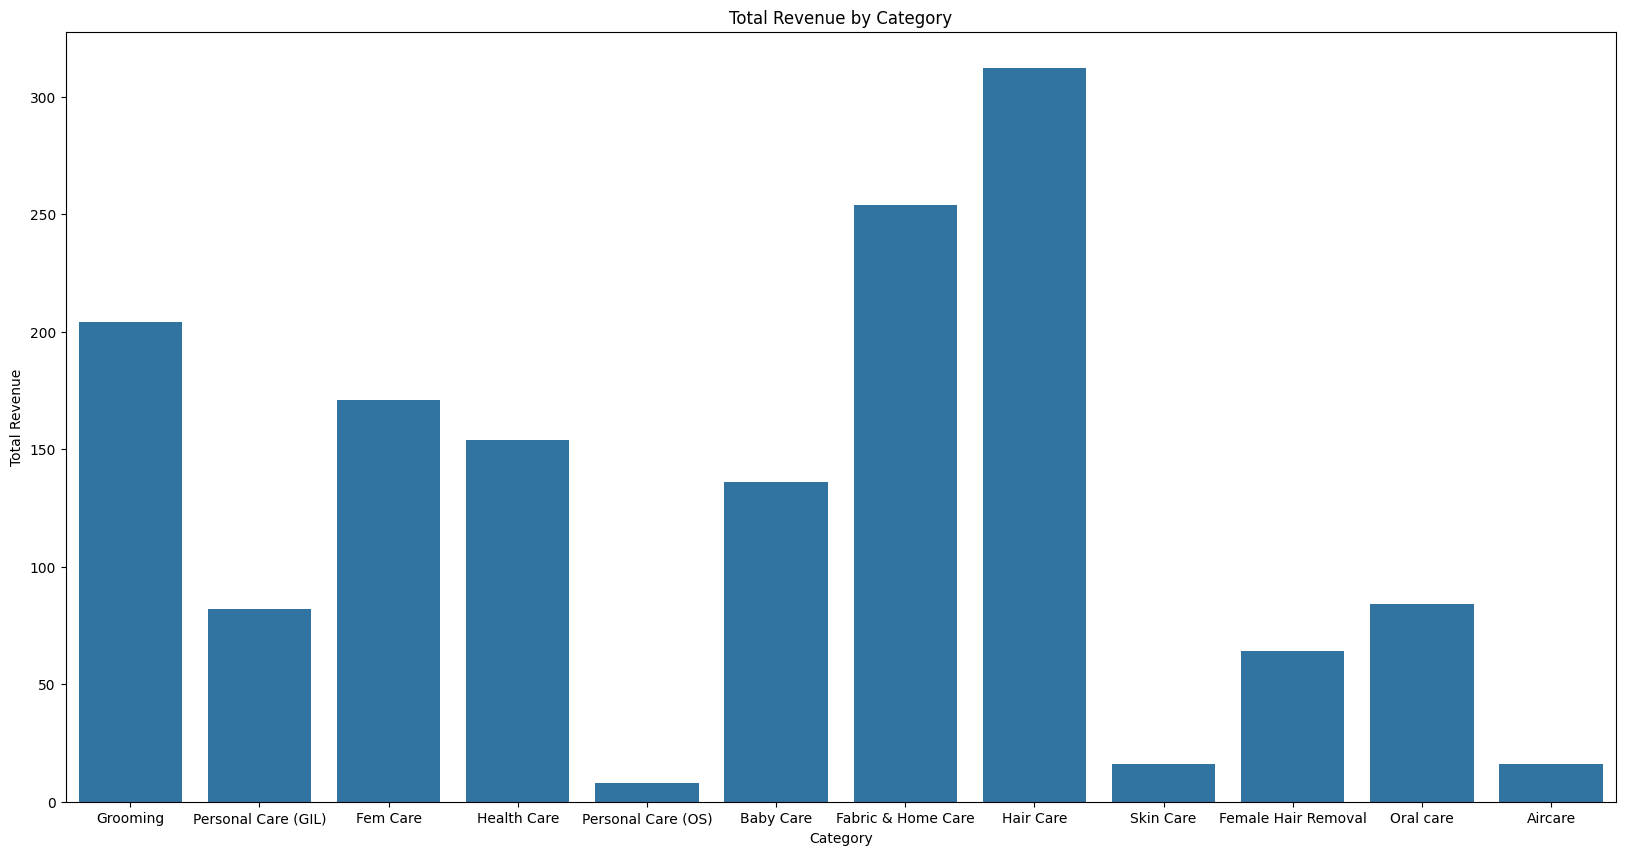

In [197]:
total_revenue_by_category = df.groupby('Category')['revenue'].sum()
plt.figure(figsize=(20, 10))
sns.countplot(x='Category', data=df)
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

### showing the total category by brand

In [198]:
total_revenue_brand = df.groupby('brand')['revenue'].sum()

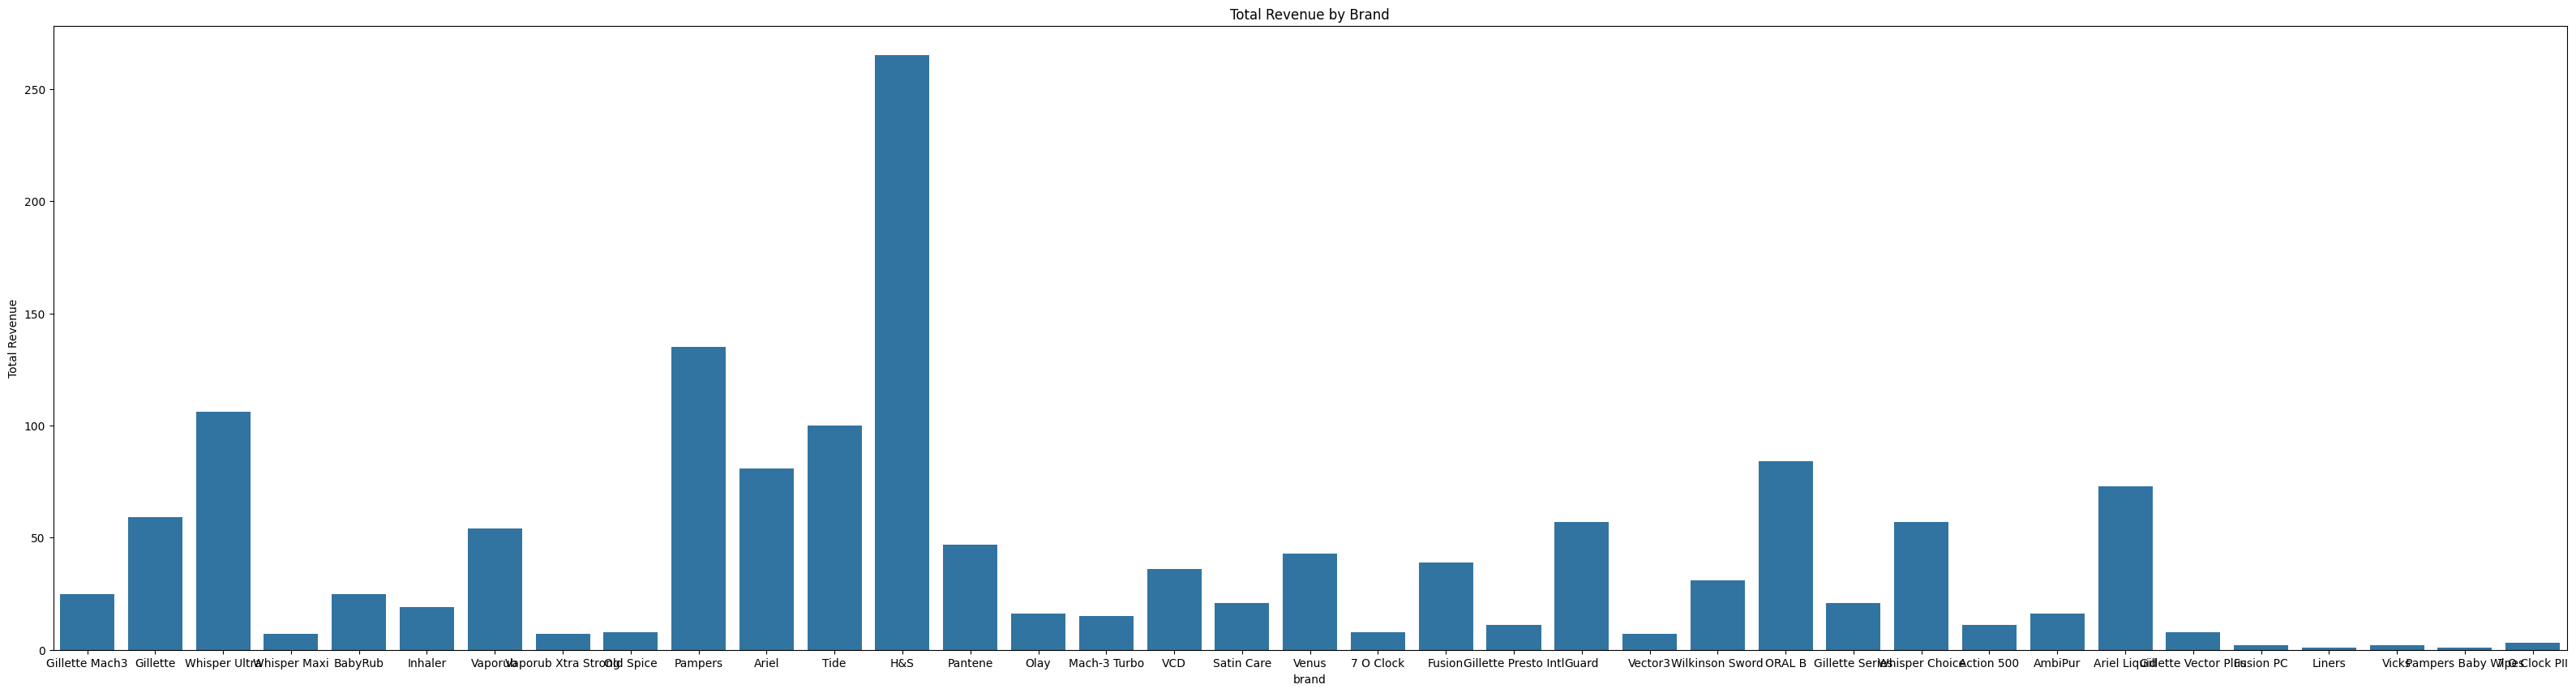

In [199]:
plt.figure(figsize=(40, 10))
sns.countplot(x='brand', data=df)
plt.title('Total Revenue by Brand')
plt.xlabel('brand')
plt.ylabel('Total Revenue')
plt.show()

### Identifying top 5 customers contributing the most revenue

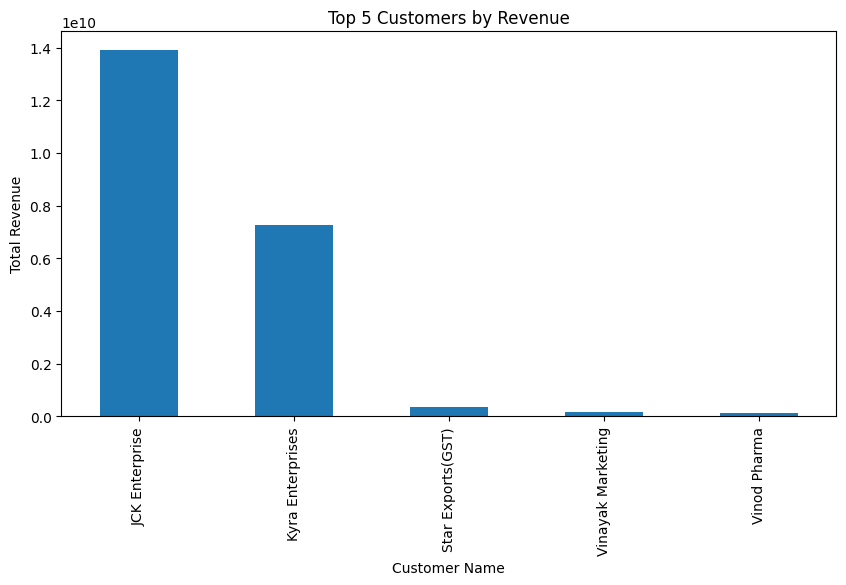

In [200]:
top_Customer = df.groupby('customer_name')['revenue'].sum().nlargest(5)
top_Customer.plot(kind='bar', figsize=(10, 5))
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.show()

 most frequently sold product by UPC for each customer_type
Group by customer_type and UPC, then count occurrences
Find the most frequent UPC for each customer_type

In [201]:
upc_counts = df.groupby(['customer_type', 'UPC'])['UPC'].count().reset_index(name='count')
most_frequent_upcs = upc_counts.loc[upc_counts.groupby('customer_type')['count'].idxmax()]

most_frequent_upcs

,customer_type,UPC,count
4,HFS (Large A Pharmacy)- D type,12,16
46,HFS (Large A Pharmacy)- D type- Sectorized,72,4
55,HFS (Large A Pharmacy)- L type- Sectorized,4,1
76,HFS (Large B Pharmacy)- D Type- Sectorized,72,13
88,HFS (Super),12,2
90,HFS Sectorized (Large A Traditional),6,3
97,HFS Sectorized (Large B Pharmacy),40,1
99,HFS Sectorized (Large B Traditional),12,5
114,Maximus 2.0 Replacement (New Traditional),32,1
116,Maximus Jun22 (New Beauty),60,7


## To calculate city wise transaction trends

we Group data by city and calculate total revenue for each city then Create a bar plot to visualize city-wise transaction trends


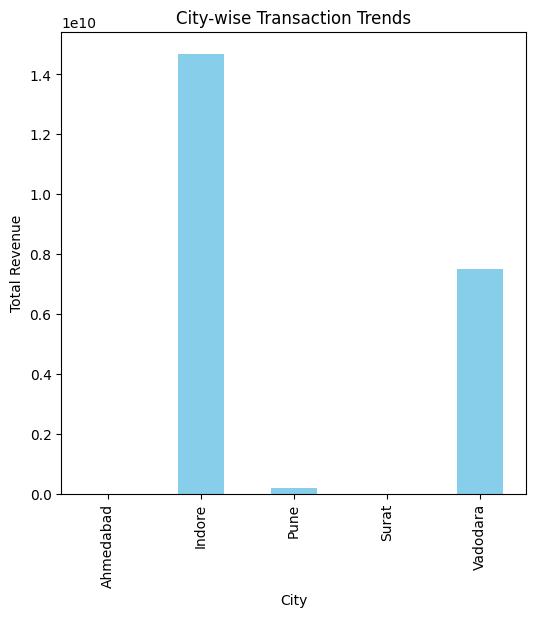

In [202]:
city_revenue = df.groupby('City')['revenue'].sum()
plt.figure(figsize=(6, 6))
city_revenue.plot(kind='bar', color='skyblue')
plt.title('City-wise Transaction Trends')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()

### Total revenue generated per city

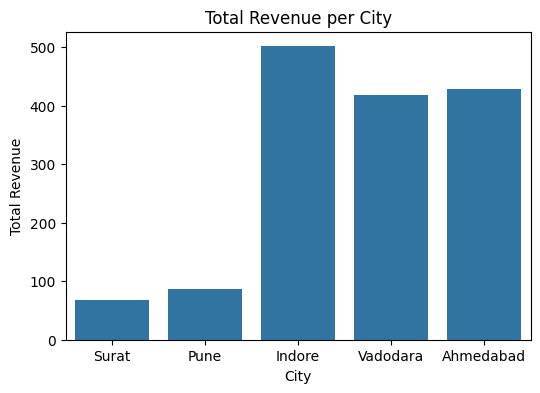

In [203]:
plt.figure(figsize=(6, 4))
sns.countplot(x= 'City', data = df)
plt.title('Total Revenue per City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()

### Calculate the number of transactions per city

In [204]:
transactions_per_city = df.groupby('City')['transaction_type'].count()


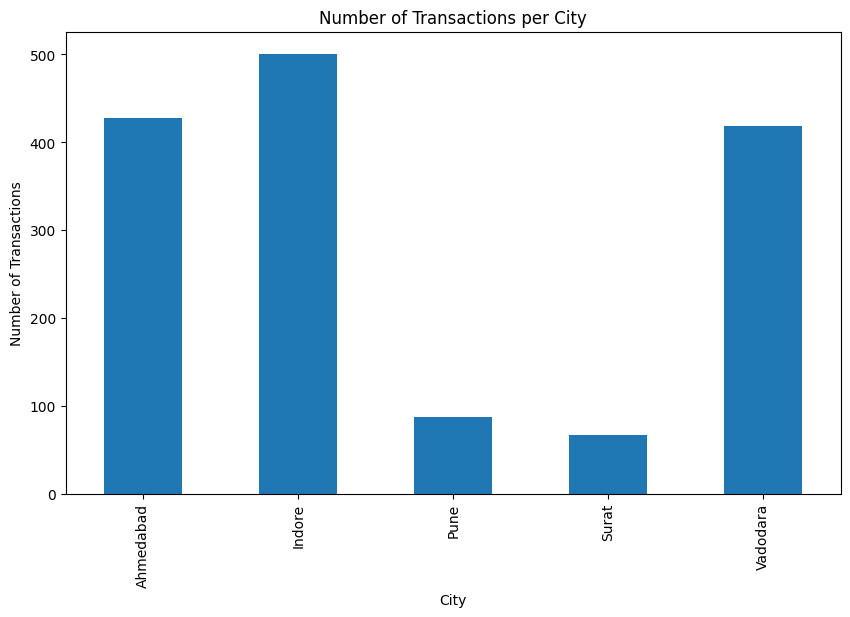

In [205]:
plt.figure(figsize=(10, 6))
transactions_per_city.plot(kind='bar')
plt.title('Number of Transactions per City')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.show()

###Average quantity sold per transaction for each channel_description

In [206]:
average_quantity_per_channel = df.groupby('channel_description')['quantity'].mean()

average_quantity_per_channel

,quantity
channel_description,
Hyper,2.500000
Large A Pharmacy,10.293194
Large A Traditional,-1.600000
Large B Pharmacy,-2.594595
Large B Traditional,-2.317073
Medium Pharmacy,-0.235294
Medium Traditional,-0.285714
New Beauty,-3.000000
New Pharmacy,-2.269231


### Identify top reasons for transactions and their impact on revenue


Analyzing reason for transaction and its impact on revenue

In [207]:
reason_revenue = df.groupby('reason for transaction')['revenue'].sum().sort_values(ascending=False)

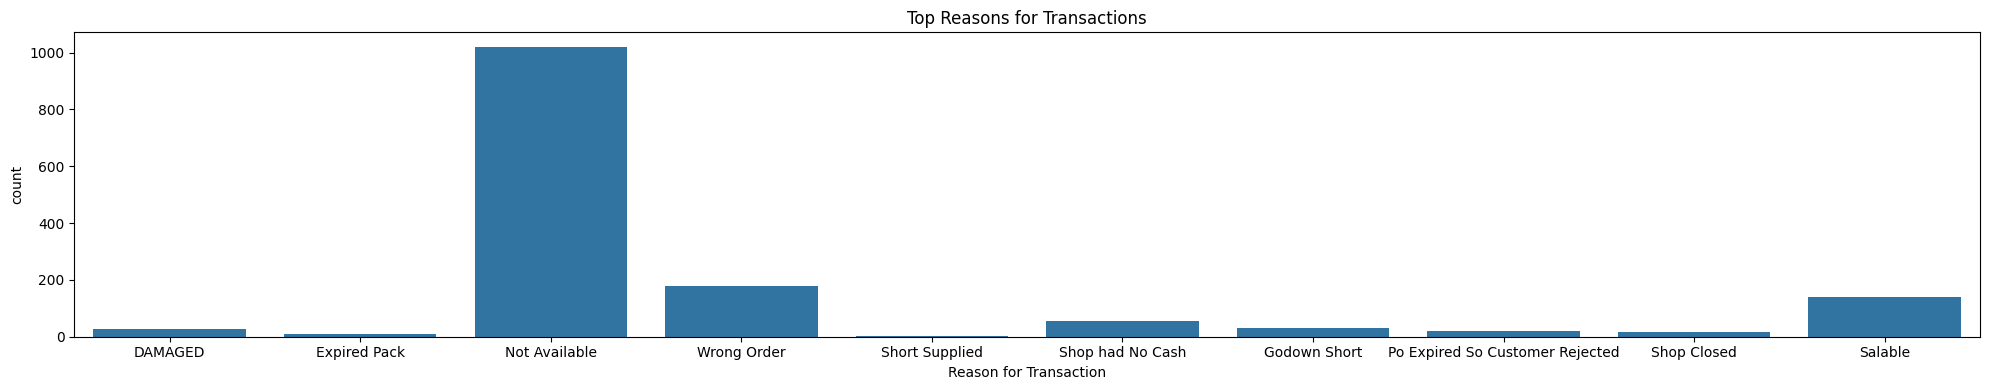

In [208]:
plt.figure(figsize=(20, 4))
sns.countplot(x='reason for transaction', data=df)
plt.xlabel('Reason for Transaction')
plt.title('Top Reasons for Transactions')
plt.tight_layout()
plt.show()

From above plot we can conclude that the reason for transaction is not available the second reason  is wrong order.